In [1]:
1.  The problem statement involves creating a machine learning model to predict the salaries of newly hired employees based on given data. This is a Linear regression problem, where the goal is to establish a relationship between input features (e.g., College,city , Role, etc.) and a continuous output variable (salary). The model can help the company streamline its hiring process, ensure fair compensation, and reduce manual effort in determining salaries. Additionally, the model should be regularly updated to adapt to changing market conditions and company policies. With a well-designed model, the company can make data-driven decisions and maintain a competitive edge in attracting top talent.

In [ ]:
2.To create a machine learning model that determines the salary of newly hired employees, I will follow a structured approach. First, I will preprocess the data by handling missing values, encoding categorical variables, and scaling/normalizing numerical features. Next, I will select relevant features that impact salary and create new ones through interaction terms or polynomial transformations to improve model performance. Then, I will train and evaluate multiple regression models, including Linear Regression, Decision Trees, Random Forest, Gradient Boosting, and Support Vector Machines (SVR), and tune hyperparameters using techniques like Grid Search or Random Search. After evaluating model performance using metrics like  Mean Squared Error (MSE), R-squared (R), and Coefficient of Determination (R adjusted), I will select the best-performing model and deploy it to predict salaries for newly hired employees. Finally, I will regularly update the model with new data to ensure accuracy and fairness, and continuously monitor model performance to retrain the model as needed.

In [ ]:
3.I considered Linear Regression as a top contender for this task. Linear Regression and Logistic Regression is a widely used and interpretable model that establishes a linear relationship between features and the target variable (salary). Its a great starting point due to its simplicity and ease of implementation. Additionally, Linear Regression and Logistic Regression provides coefficients that indicate the impact of each feature on the predicted salary. However, it assumes a linear relationship between features and salary, which might not always hold true in real-world scenarios. Despite this, Linear Regression remains a strong baseline model for salary prediction.

In [ ]:
4.The Linear Regression model performs the best, with a high R-squared value (0.59) . This is because Linear Regression is well-suited for salary prediction, which tends to have a linear relationship with factors like experience and previous CTC. Additionally, Linear Regression is sensitive to feature correlations, and salary data often exhibits strong correlations between features. The models simplicity and interpretability also make it a great choice for this task. Overall, Linear Regressions strong performance is due to its ability to capture linear relationships and correlations in the data.

In [ ]:
5.  * Feature Engineering: Create new features that capture non-linear relationships, interactions, or polynomial transformations of existing features.

* Feature Selection: Select the most relevant features using techniques like recursive feature elimination or correlation analysis.

* Regularization: Apply regularization techniques like Lasso or Ridge regression to reduce overfitting.

*  Hyperparameter Tuning: Optimize hyperparameters like learning rate, batch size, or number of iterations.

* Data Transformation: Transform skewed features using log, square root, or box-cox transformations.

* Handling Outliers: Identify and handle outliers using techniques like winsorization or robust regression.

* Ensemble Methods: Combine Linear Regression with other models using ensemble methods like stacking or bagging.

* Cross-Validation: Use techniques like k-fold cross-validation to evaluate model performance and avoid overfitting.


In [ ]:
import numpy as np
import pandas as  pd
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\vasala harinadha\\OneDrive\\Desktop\\machine_learning_case_study.csv' , header=0)


In [3]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,NaN,NaN,NaN
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,NaN,NaN,NaN
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,NaN,NaN,_l
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,NaN,NaN,NaN
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285,3,44,60,77283.59,NaN,NaN,NaN
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140,1,44,24,68416.86,NaN,NaN,NaN
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907,1,60,19,70186.19,NaN,NaN,NaN
1587,IIIT Hyderabad,Durgapur,Executive,52054,2,67,29,73394.09,NaN,NaN,NaN


In [4]:
del df["Unnamed: 8"]
del df["Unnamed: 9"]
del df["Unnamed: 10"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


In [6]:
#var={"metrocity":["Mumbai","Delhi","Kolkata","Chennai","Banglore","Hyderabad","Ahmedabad","Pune","Surat"],
    #"non_metro_cities ":["Dehradun","Durgapur","Asansol","Rourkela","Kozhikode","Rajpur Sonarpur","Kolhapur","Ajmer"]}

In [7]:
df["City"]=df["City"].replace(["Mumbai","Delhi","Kolkata","Chennai","Bangalore","Hyderabad","Ahmedabad","Pune","Surat"],"metrocity")

In [8]:
df["City"]=df["City"].replace(["Dehradun","Durgapur","Asansol","Rourkela","Kozhikode","Rajpur Sonarpur","Kolhapur","Ajmer"],"non_metro_cities")

In [9]:
df["City"].head()

0    non_metro_cities
1    non_metro_cities
2    non_metro_cities
3    non_metro_cities
4    non_metro_cities
Name: City, dtype: object

In [10]:
#jk=["IIT Bombay","IIT Delhi","IIT Kharagpur","IIT Madras","IIT Kanpur","IIT Roorkee","IIT Guwahati","IIIT Hyderabad","BITS Pilani (Pilani Campus)","IIT Indore","IIT Ropar","IIT BHU (Varanasi)","IIT ISM Dhanbad","DTU","NSUT Delhi (NSIT)","NIT Tiruchipally (Trichy)","NIT Warangal","NIT Surathkal (Karnataka)","Jadavpur University","BITS Pilani (Hyderabad Campus)","BITS Pilani (Goa Campus)","IIIT Allahabad"]

In [11]:
#jkk=["MNNIT Allahabad","Punjab Engineering College","DAIICT","MNIT Jaipur","NIT Durgapur","VNIT Nagpur","LNMIIT","BIT Mesra","SVNIT Surat","NIT Jalandhar","NIT Jamshedpur","NIT Kurukshetra","NIT Patna","NIT Raipur","NIT Bhopal","NIT Rourkela","NIT Silchar","NIT Sikkim","IIIT Jabalpur","Jalpaiguri Government Engineering College","IIEST/BESU Shibpur","R.V. College of Engineering"]

In [12]:
#jkkk=["Amity University","BMS College, Bangalore","PES University, Bangalore","USIT, Delhi","MAIT, Delhi","MSIT, Delhi","Dayanand College of Engineering, Bangalore","Heritage Institute of Technology, Kolkata","IEM, Kolkata","Techno India, Kolkata","Jaypee, Noida","Amrita University, Coimbatore","Cummins College of Engineering for Women, Pune"]

In [13]:
df["College"]=df["College"].replace(["IIT Bombay","IIT Delhi","IIT Kharagpur","IIT Madras","IIT Kanpur","IIT Roorkee","IIT Guwahati","IIIT Hyderabad","BITS Pilani (Pilani Campus)","IIT Indore","IIT Ropar","IIT BHU (Varanasi)","IIT ISM Dhanbad","DTU","NSUT Delhi (NSIT)","NIT Tiruchipally (Trichy)","NIT Warangal","NIT Surathkal (Karnataka)","Jadavpur University","BITS Pilani (Hyderabad Campus)","BITS Pilani (Goa Campus)","IIIT Allahabad"],"Tier1")

In [14]:
df["College"]=df["College"].replace(["IIIT Bangalore","IIIT Delhi","IGDTUW","NIT Calicut","IIITM Gwalior","IIIT Lucknow","MNNIT Allahabad","Punjab Engineering College","DAIICT","MNIT Jaipur","NIT Durgapur","VNIT Nagpur","LNMIIT","BIT Mesra","SVNIT Surat","NIT Jalandhar","NIT Jamshedpur","NIT Kurukshetra","NIT Patna","NIT Raipur","NIT Bhopal","NIT Rourkela","NIT Silchar","NIT Sikkim","IIIT Jabalpur","Jalpaiguri Government Engineering College","IIEST/BESU Shibpur","R.V. College of Engineering"],"tier2")

In [15]:
 df["College"]=df["College"].replace(["Ramaiah Institute of Technology, Bengaluru","TIET/Thapar University","Manipal Main Campus","VIT Vellore","SRM Main Campus","KIIT, Bhubaneswar","Amity University","BMS College, Bangalore","PES University, Bangalore","USIT, Delhi","MAIT, Delhi","MSIT, Delhi","Dayanand College of Engineering, Bangalore","Heritage Institute of Technology, Kolkata","IEM, Kolkata","Techno India, Kolkata","Jaypee, Noida","Amrita University, Coimbatore","Cummins College of Engineering for Women, Pune"],"tier3")

In [16]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,tier2,non_metro_cities,Manager,55523,3,66,19,71406.58
1,tier2,non_metro_cities,Executive,57081,1,84,18,68005.87
2,tier3,non_metro_cities,Executive,60347,2,52,28,76764.02
3,tier3,non_metro_cities,Executive,49010,2,81,33,82092.39
4,Tier1,non_metro_cities,Executive,57879,4,74,32,73878.10


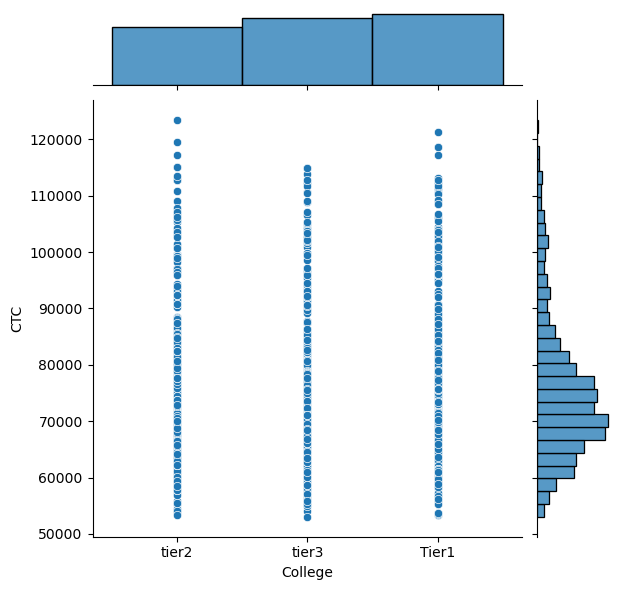

In [17]:
sns.jointplot(x='College', y='CTC'    ,data=df)

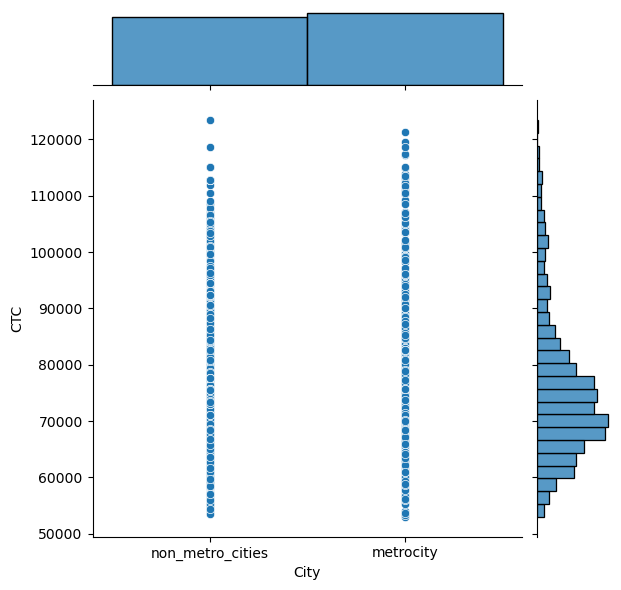

In [18]:
sns.jointplot(x='City', y='CTC'    ,data=df)

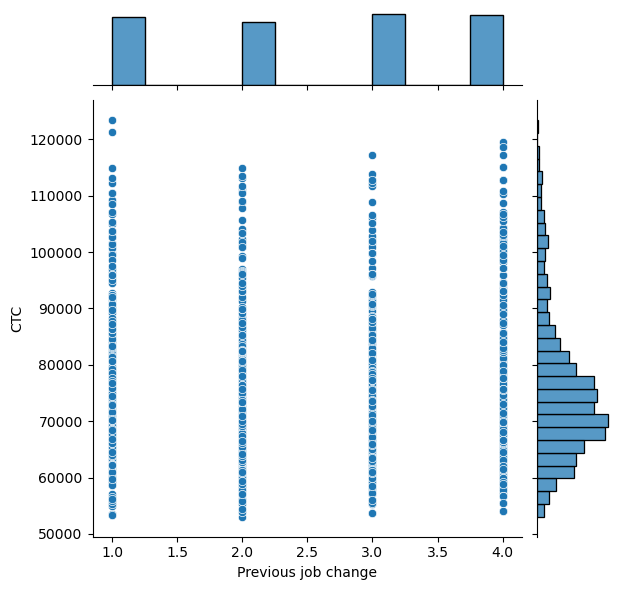

In [19]:
sns.jointplot(x='Previous job change', y='CTC'    ,data=df)

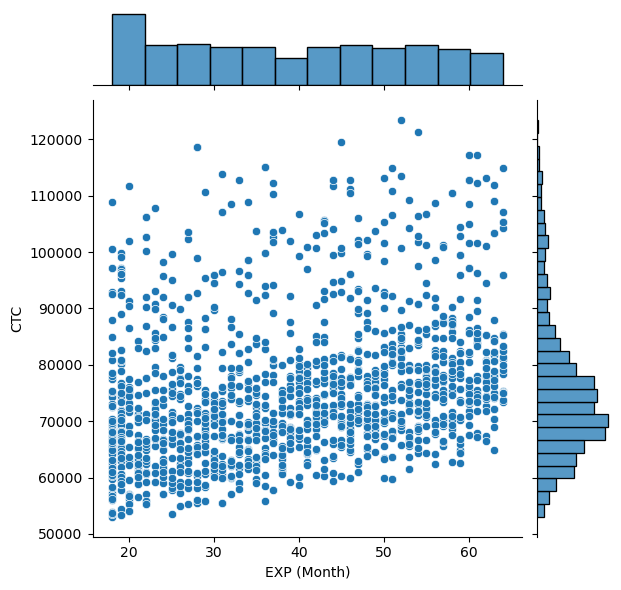

In [20]:
sns.jointplot(x='EXP (Month)', y='CTC'    ,data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


In [22]:
df = pd.get_dummies(df).astype(int)

In [23]:
df

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
0,55523,3,66,19,71406,0,1,0,0,1,0,1
1,57081,1,84,18,68005,0,1,0,0,1,1,0
2,60347,2,52,28,76764,0,0,1,0,1,1,0
3,49010,2,81,33,82092,0,0,1,0,1,1,0
4,57879,4,74,32,73878,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1584,61285,3,44,60,77283,1,0,0,1,0,1,0
1585,63140,1,44,24,68416,1,0,0,0,1,1,0
1586,44907,1,60,19,70186,1,0,0,1,0,1,0
1587,52054,2,67,29,73394,1,0,0,0,1,1,0


Removing Outliers


In [24]:

p=npp = np.percentile(df['Previous job change'], [99])[0]
p
#df['Previous job change'][df['Previous job change']>3*p]=3*p


4.0

In [25]:
df['Previous job change'][df['Previous job change']>3*p]=3*p


In [26]:
p= np.percentile(df['EXP (Month)'], [1])[0]
p
df['EXP (Month)'][df['EXP (Month)']<3*p]=3*p


In [27]:

p= np.percentile(df['City_non_metro_cities'], [99])[0]
p
df['City_non_metro_cities'][df['City_non_metro_cities']>3*p]=3*p


In [28]:
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.065770,0.257998,-0.031366,-0.010947,0.042438,0.004644,-0.004644,-0.012321,0.012321
Previous job change,0.005756,1.000000,0.019267,0.025550,0.011370,0.045931,0.004271,-0.050794,0.051670,-0.051670,0.017150,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.018770,-0.005449,0.005666,-0.018419,0.012021,-0.018616,0.018616,-0.017858,0.017858
EXP (Month),0.065770,0.025550,-0.018770,1.000000,0.221017,0.017638,-0.056679,0.036783,-0.020726,0.020726,-0.011476,0.011476
CTC,0.257998,0.011370,-0.005449,0.221017,1.000000,0.019912,0.012347,-0.032150,-0.020365,0.020365,-0.621310,0.621310
College_Tier1,-0.031366,0.045931,0.005666,0.017638,0.019912,1.000000,-0.491510,-0.541736,0.002135,-0.002135,-0.015158,0.015158
College_tier2,-0.010947,0.004271,-0.018419,-0.056679,0.012347,-0.491510,1.000000,-0.465741,0.022917,-0.022917,0.004865,-0.004865
College_tier3,0.042438,-0.050794,0.012021,0.036783,-0.032150,-0.541736,-0.465741,1.000000,-0.024288,0.024288,0.010706,-0.010706
City_metrocity,0.004644,0.051670,-0.018616,-0.020726,-0.020365,0.002135,0.022917,-0.024288,1.000000,-1.000000,0.048671,-0.048671
City_non_metro_cities,-0.004644,-0.051670,0.018616,0.020726,0.020365,-0.002135,-0.022917,0.024288,-1.000000,1.000000,-0.048671,0.048671


In [29]:
# I feel that there is less Correlation between the variables

In [30]:
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.065770,0.257998,-0.031366,-0.010947,0.042438,0.004644,-0.004644,-0.012321,0.012321
Previous job change,0.005756,1.000000,0.019267,0.025550,0.011370,0.045931,0.004271,-0.050794,0.051670,-0.051670,0.017150,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.018770,-0.005449,0.005666,-0.018419,0.012021,-0.018616,0.018616,-0.017858,0.017858
EXP (Month),0.065770,0.025550,-0.018770,1.000000,0.221017,0.017638,-0.056679,0.036783,-0.020726,0.020726,-0.011476,0.011476
CTC,0.257998,0.011370,-0.005449,0.221017,1.000000,0.019912,0.012347,-0.032150,-0.020365,0.020365,-0.621310,0.621310
College_Tier1,-0.031366,0.045931,0.005666,0.017638,0.019912,1.000000,-0.491510,-0.541736,0.002135,-0.002135,-0.015158,0.015158
College_tier2,-0.010947,0.004271,-0.018419,-0.056679,0.012347,-0.491510,1.000000,-0.465741,0.022917,-0.022917,0.004865,-0.004865
College_tier3,0.042438,-0.050794,0.012021,0.036783,-0.032150,-0.541736,-0.465741,1.000000,-0.024288,0.024288,0.010706,-0.010706
City_metrocity,0.004644,0.051670,-0.018616,-0.020726,-0.020365,0.002135,0.022917,-0.024288,1.000000,-1.000000,0.048671,-0.048671
City_non_metro_cities,-0.004644,-0.051670,0.018616,0.020726,0.020365,-0.002135,-0.022917,0.024288,-1.000000,1.000000,-0.048671,0.048671


In [31]:
df.head()


,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
0,55523,3,66,54,71406,0,1,0,0,1,0,1
1,57081,1,84,54,68005,0,1,0,0,1,1,0
2,60347,2,52,54,76764,0,0,1,0,1,1,0
3,49010,2,81,54,82092,0,0,1,0,1,1,0
4,57879,4,74,54,73878,1,0,0,0,1,1,0


# simple Linear Regression Using Statsmodel

In [32]:
import statsmodels.api as sn

In [33]:
x=df[["EXP (Month)"]]

In [34]:
y=df["CTC"]

In [35]:
lm_multi=sn.OLS(y,x).fit()

In [36]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CTC   R-squared (uncentered):                -202.378
Model:                            OLS   Adj. R-squared (uncentered):           -202.507
Method:                 Least Squares   F-statistic:                             -1580.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        1.00
Time:                        20:10:33   Log-Likelihood:                         -17217.
No. Observations:                1589   AIC:                                  3.444e+04
Df Residuals:                    1588   BIC:                                  3.444e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
EXP (Month)  1370.3139      5.601    244.642      0.000    1359.327    1381.301
==============================================================================
Omnibus:                      281.076   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.979
Skew:                           1.160   Prob(JB):                    2.92e-101
Kurtosis:                       4.271   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Simple Linear Regression using Sklearn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
x=df[["EXP (Month)"]]

In [39]:
y=df["CTC"]

In [40]:
lm_1=LinearRegression()

In [41]:
lm_1.fit(x,y)

LinearRegression()

In [42]:
print(lm_1.intercept_,lm_1.coef_)

11489.360889285854 [1161.71155595]


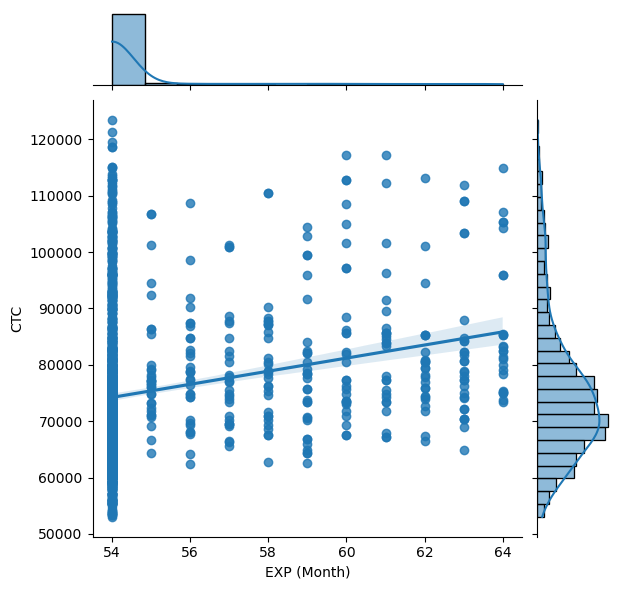

In [43]:
sns.jointplot(x='EXP (Month)', y='CTC'    ,data=df, kind="reg")

# Multi linear regression Using Statsmodel

In [44]:
import statsmodels.api as sn

In [45]:
x=df.drop("CTC",axis=1)

In [46]:
y=df["CTC"]


In [47]:
x_multi_cons=sn.add_constant(x)

In [48]:
lm_multi=sn.OLS(y,x_multi_cons).fit()

In [49]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          7.49e-225
Time:                        20:10:47   Log-Likelihood:                -16720.
No. Observations:                1589   AIC:                         3.346e+04
Df Residuals:                    1580   BIC:                         3.351e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -871.8684   2378.618     -0.367      0.714   -5537.447    3793.711
Previous CTC              0.4514      0.034     13.236      0.000       0.384       0.518
Previous job change     146.4669    201.906      0.725      0.468    -249.565     542.499
Graduation Marks         -3.5632     15.162     -0.235      0.814     -33.302      26.176
EXP (Month)            1051.6217     94.854     11.087      0.000     865.569    1237.674
College_Tier1           -76.5182    855.778     -0.089      0.929   -1755.098    1602.061
College_tier2           251.5602    842.009      0.299      0.765   -1400.013    1903.133
College_tier3         -1046.9103    868.812     -1.205      0.228   -2751.057     657.236
City_metrocity         -300.3827   1207.280     -0.249      0.804   -2668.423    2067.657
City_non_metro_cities  -571.4857   1214.216     -0.471      0.638   -2953.129    1810.158
Role_Executive        -1.002e+04   1209.372     -8.286      0.000   -1.24e+04   -7648.384
Role_Manager           9148.6591   1234.030      7.414      0.000    6728.151    1.16e+04
==============================================================================
Omnibus:                       46.208   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.183
Skew:                           0.371   Prob(JB):                     2.83e-12
Kurtosis:                       3.502   Cond. No.                     5.45e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Multi  linear regression Using Sklearn

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
x=df.drop("CTC",axis=1)


In [52]:
lg_a=LinearRegression()

In [53]:
lg_a.fit(x,y)

LinearRegression()

In [54]:
print(lg_a.intercept_,lg_a.coef_)

-2034.359560286277 [ 4.51383944e-01  1.46466896e+02 -3.56315349e+00  1.05162170e+03
  2.14104563e+02  5.42182964e+02 -7.56287527e+02  1.35551473e+02
 -1.35551473e+02 -9.58459325e+03  9.58459325e+03]


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_multi=df.drop("CTC",axis=1)

In [58]:
y_multi=df["CTC"]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [60]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 11) (318, 11) (1271,) (318,)


In [61]:
lm_a=LinearRegression()

In [62]:
lm_a.fit(x_train,y_train)

LinearRegression()

In [63]:
print(lm_a.intercept_,lm_a.coef_)

-2609.994877504083 [ 4.79938152e-01  9.95821457e+01  4.27383110e+00  1.02595994e+03
  1.06094747e+02  5.34729948e+02 -6.40824695e+02  4.07947594e+02
 -4.07947594e+02 -9.45458507e+03  9.45458507e+03]


In [79]:
y_test_a=lm_a.predict(x_test)

In [80]:
y_test_a

array([ 64812.54009885,  68396.48273702,  66194.33078037,  67202.05149561,
        74148.84553094,  87444.84465045,  66767.38702335,  67065.50407069,
        76095.41359861,  69960.50273212,  71214.94279416,  81128.54161404,
        89471.90402541,  80338.08183637,  73865.04862422,  92498.98260699,
        68289.03275097,  70772.825707  ,  68932.25081066,  79433.64939412,
        90645.93320419,  93856.67311998,  72412.26175901,  68159.76709396,
        70679.99776004,  70891.71837555,  72178.75348525,  92039.26926673,
        67441.92414909,  70675.50126583,  73106.0617827 ,  74147.02901592,
        85570.42622142,  79741.50385509, 100961.59789127,  76887.39321342,
        72669.08551313,  81846.81103346,  76395.95347467,  67957.03346342,
        73694.91725941,  85847.3052995 ,  70912.90999859,  70999.27941749,
        72959.89752073,  76887.97681438,  83879.91454053,  69146.29351434,
        72853.05008761,  74349.53914765,  91910.16310285,  64785.33685953,
        91341.1113795 ,  

In [65]:
y_train_a=lm_a.predict(x_train)

In [ ]:
    '''pending'''
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,lm_a.predict(x_test))

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_a)
r2_score(y_train,y_train_a)

0.4906973250819059

In [69]:
r2_score(y_train,y_train_a)

0.4906973250819059

In [70]:
from sklearn import preprocessing

In [71]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train1=scaler.transform(x_train)

In [72]:
x_test1=scaler.transform(x_test)

In [73]:
from sklearn.linear_model import Ridge

In [76]:
lm_r=Ridge(alpha=0.1)
lm_r.fit(x_train1,y_train)
x_train

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
1062,61410,4,83,59,1,0,0,0,1,0,1
215,59781,1,46,54,1,0,0,1,0,1,0
654,62521,1,70,59,1,0,0,0,1,1,0
55,66624,1,63,58,1,0,0,0,1,0,1
1187,54621,2,52,62,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,54660,3,43,54,0,1,0,0,1,1,0
835,58049,2,51,54,1,0,0,1,0,1,0
1216,52744,4,80,54,0,0,1,1,0,1,0
559,56519,1,64,54,1,0,0,0,1,1,0


In [75]:
r2_score(y_test,lm_r.predict(x_test1))

0.48266183461467194

# logistic Regression Model

In [333]:
# simple logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [311]:
x=df[["Previous job change"]]

In [312]:
y=df["CTC"]

In [313]:
mk=LogisticRegression()

In [314]:
mk.fit(x,y)

LogisticRegression()

In [315]:
print(mk.intercept_,mk.coef_)

[ 0.66716403  2.91164332  1.69049017 ... -2.12395326  1.69049017
  1.69049017] [[-0.25709639]
 [-1.08816649]
 [-0.76853477]
 ...
 [ 0.74481711]
 [-0.76853477]
 [-0.76853477]]


In [317]:
# Multi  logistic Regression Model
x_multi=df.drop("CTC",axis=1)

In [318]:
y=df["CTC"]

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [321]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 11) (318, 11) (1271,) (318,)


In [322]:
lm_r=LogisticRegression()

In [323]:
lm_r.fit(x_train,y_train)

C:\Users\vasala harinadha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [325]:
print(lm_r.intercept_,lm_r.coef_)

[ 0.00024855 -0.00153934 -0.00047614 ... -0.00122403 -0.00485387
 -0.00133201] [[ 6.07750890e-04 -4.41686003e-02 -6.66829534e-01 ... -1.41278039e-02
   6.27074811e-03 -6.02220229e-03]
 [ 3.11193159e-04 -2.62870976e-02 -1.70652954e-01 ...  6.69114678e-03
   1.80798697e-03 -3.34732939e-03]
 [ 4.54555006e-04  1.23306624e-02 -3.88921831e-01 ...  1.03997487e-04
   5.69784155e-03 -6.17397671e-03]
 ...
 [ 4.43764457e-04  1.82662933e-02 -3.56120472e-01 ... -7.73958229e-03
  -1.25270372e-02  1.13030098e-02]
 [ 3.73030913e-04 -3.46949849e-02 -6.10007965e-02 ... -9.50952698e-03
  -1.53991931e-02  1.05453243e-02]
 [ 3.76730912e-04 -2.57612104e-02 -2.60439044e-01 ...  6.79228425e-03
  -1.26124863e-02  1.12804774e-02]]


In [326]:
y_test_a=lm_r.predict(x_test)

In [327]:
y_train_a=lm_r.predict(x_train)

In [328]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_a)
r2_score(y_train,y_train_a)

-0.7402095343912529

In [329]:
r2_score(y_train,y_train_a)

-0.7402095343912529

In [78]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
0,55523,3,66,54,71406,0,1,0,0,1,0,1
1,57081,1,84,54,68005,0,1,0,0,1,1,0
2,60347,2,52,54,76764,0,0,1,0,1,1,0
3,49010,2,81,54,82092,0,0,1,0,1,1,0
4,57879,4,74,54,73878,1,0,0,0,1,1,0


# KNN

In [82]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
0,55523,3,66,54,71406,0,1,0,0,1,0,1
1,57081,1,84,54,68005,0,1,0,0,1,1,0
2,60347,2,52,54,76764,0,0,1,0,1,1,0
3,49010,2,81,54,82092,0,0,1,0,1,1,0
4,57879,4,74,54,73878,1,0,0,0,1,1,0


In [83]:
x_multi=df.drop("CTC",axis=1)

In [84]:
y_multi=df["CTC"]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [86]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 11) (318, 11) (1271,) (318,)


In [82]:
from sklearn import preprocessing
scalr=preprocessing.StandardScaler().fit(x_train)
x_train_s=scaler.transform(x_train)

In [83]:
scaler=preprocessing.StandardScaler().fit(x_test)
x_test_s=scaler.transform(x_test)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1=KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [86]:
confusion_matrix(y_test,clf_knn_1.predict(x_test))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [ ]:

accuracy_score(y,clf_knn_1.predict(x_train_s))
clf_knn_3=KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(x_train_s,y_train)
accuracy_score(y,clf_knn_3.predict(x_test_s))

In [354]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_search_cv=GridSearchCV(KNeighborsClassifier(),params)

In [ ]:
grid_search_cv.fit(x_train_s,y_train)
grid_search_cv.best_params_
optimised_knn=grid_search_cv.best_estimator_

In [ ]:
y_test_pred=optimised_knn.predict(x_test_s)

In [ ]:
confusion_matrix(y_test,y_test_pred)

In [ ]:
accuracy_score(y_test,y_test_pred)

# Decision tree Regressior

In [180]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
0,55523,3,66,54,71406,0,1,0,0,1,0,1
1,57081,1,84,54,68005,0,1,0,0,1,1,0
2,60347,2,52,54,76764,0,0,1,0,1,1,0
3,49010,2,81,54,82092,0,0,1,0,1,1,0
4,57879,4,74,54,73878,1,0,0,0,1,1,0


In [219]:
x=df.loc[:,df.columns!='CTC']

In [220]:
y=df["CTC"]

In [221]:
type(x)
x.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
0,55523,3,66,54,0,1,0,0,1,0,1
1,57081,1,84,54,0,1,0,0,1,1,0
2,60347,2,52,54,0,0,1,0,1,1,0
3,49010,2,81,54,0,0,1,0,1,1,0
4,57879,4,74,54,1,0,0,0,1,1,0


In [222]:
from sklearn.model_selection import train_test_split

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [187]:
x_test.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),College_Tier1,College_tier2,College_tier3,City_metrocity,City_non_metro_cities,Role_Executive,Role_Manager
900,43788,4,85,54,1,0,0,0,1,1,0
427,51533,3,61,54,0,0,1,1,0,1,0
219,44261,4,64,54,0,1,0,1,0,1,0
1101,49258,3,37,54,0,0,1,1,0,1,0
748,64931,4,70,54,0,0,1,0,1,1,0


In [88]:
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [89]:
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [90]:
#predict

y_test_pred=regtree.predict(x_test)

In [91]:
y_train_pred=regtree.predict(x_train)

In [92]:
y_train_pred

array([104058.6741573 ,  69400.97443182,  80469.42105263, ...,
        69400.97443182,  69400.97443182,  69400.97443182])

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
mean_squared_error(y_test,y_test_pred)

66085011.47443715

In [95]:
r2_score(y_train,y_train_pred)

0.5857249832312482

In [96]:
r2_score(y_test,y_test_pred)

0.5546369213141513

In [ ]:
!pip install pydotplus
!pip install Ipython

In [97]:
dot_data=tree.export_graphviz(regtree,out_file=None,feature_names=x_train.columns,filled=True)

In [98]:
from IPython.display import Image

In [99]:
import pydotplus

In [100]:
graph =pydotplus.graph_from_dot_data(dot_data)


In [101]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [105]:
y_train_pred

array([104058.6741573 ,  69400.97443182,  80469.42105263, ...,
        69400.97443182,  69400.97443182,  69400.97443182])

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_train,y_train_pred)

In [94]:
confusion_matrix(y_test,y_test_pred)

NameError: name 'y_test_pred' is not defined

In [234]:
accuracy_score(y_test,regtree.predict(x_test))

0.0

In [87]:
regtree=tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree,out_file=None,feature_names=x_train.columns,filled=True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

NameError: name 'tree' is not defined

In [ ]:
regtree=tree.DecisionTreeRegressor(min_samples_split=3)
regtree.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree,out_file=None,feature_names=x_train.columns,filled=True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
regtree=tree.DecisionTreeRegressor(min_samples_leaf=3)
regtree.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree,out_file=None,feature_names=x_train.columns,filled=True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Classification

In [273]:
from sklearn import tree
var=tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
x=df.loc[:,df.columns!='CTC']
y=df["CTC"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [276]:

var.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [277]:
y_train_s=var.predict(x_train)

In [278]:
y_test_s=var.predict(x_test)

In [279]:
confusion_matrix(y_train,y_train_s)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
accuracy_score(y_test,regtree.predict(x_test))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test,y_test_pred)

In [ ]:
r2_score(y_train,y_train_pred)

In [ ]:
r2_score(y_test,y_test)

In [ ]:
regtree=tree.DecisionTreeClassifier(max_depth=3)
regtree.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree,out_file=None,feature_names=x_train.columns,filled=True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
regtree=tree.DecisionTreeClassifier(min_samples_split=3)
regtree.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree,out_file=None,feature_names=x_train.columns,filled=True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
regtree=tree.DecisionTreeClassifier(min_samples_leaf=3)
regtree.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree,out_file=None,feature_names=x_train.columns,filled=True)
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# RandomForestClassifier

In [281]:
from sklearn.ensemble import RandomForestClassifier

In [282]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [283]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [284]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [285]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.0660377358490566

# Grid search

In [305]:
from sklearn.model_selection import GridSearchCV

In [306]:
rf=RandomForestClassifier(n_estimators=250,random_state=42)

In [307]:
params_grid={"max_features":[4,5,6,7,8,9],"min_samples_split":[2,3,10]}

In [ ]:
grid_search.fit(x_train,y_train)

In [295]:
grid_search.best_params_

{'max_features': 9, 'min_samples_split': 10}

In [ ]:
nk=grid_search.best_estimator_

In [ ]:
accuracy_score(y_test,nk.predict(x_test))

In [ ]:
confusion_matrix(y_test,nk.predict(x_test))

# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

In [ ]:
accuracy_score(y_train,gbc.predict(x_train))

In [ ]:
accuracy_score(y_test,gbc.predict(x_test))


In [ ]:
gbc1=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)

In [ ]:
gbc1.fit(x_train,y_train)
accuracy_score(y_train,gbc1.predict(x_train))

In [ ]:
accuracy_score(y_test,gbc1.predict(x_test))



# XGB

In [359]:
import xgboost as xgb

In [360]:
mk=xgb.XGBClassifier(max_depth=3,n_estimators=1000,learning_rate=0.3,n_jobs=-1)

In [ ]:
mk.fit(x_train,y_train)

In [ ]:
accuracy_score(y_test,mk.predict(x_test))


In [ ]:
xgb.plot_importance(mk)